In [102]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [103]:
# Dataset paths
# data_dir = r'C:\Users\mehmo\Downloads\Cracks\crack_dataset

data_dir = '/content/drive/MyDrive/Machine_Learning_Course/Mini_Project_2/crack_dataset'

# Subdirectory and image file name (change this to an actual file in your dataset)
subdir = 'fatigue'
image_filename = 'fatigue_1.png'  # Change this to the image you want to load

# Construct the full image path
img_path = os.path.join(data_dir, subdir, image_filename)

# Check if the image exists
if os.path.exists(img_path):
    # Read the image as grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        print(f"Image {image_filename} loaded successfully!")

        # Resize the image to 128x128 (optional)
        img_resized = cv2.resize(img, (128, 128))

        # Show the image in a window
        cv2.imshow("Loaded Image", img_resized)

        # Wait for a key press to close the window
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f"Warning: Image {image_filename} could not be loaded.")
else:
    print(f"Warning: Image at path {img_path} does not exist.")

Image fatigue_1.png loaded successfully!


enumerate is a built-in function that takes the list as input and returns a tuple with the index and the element

In [104]:
# Concept of python built-in functions enumerates

fruits = ['apple', 'banana', 'cherry']  
for index, fruit in enumerate(fruits):  
    print(index, fruit)

0 apple
1 banana
2 cherry


In [ ]:
# Dataset paths
#data_dir = r'C:\Users\mehmo\Downloads\Cracks\crack_dataset'

data_dir = '/content/drive/MyDrive/Machine_Learning_Course/Mini_Project_2/crack_dataset'

# Subdirectories in the crack_dataset folder
subdirectories = ['fatigue', 'thermal', 'stress_corrosion', 'hydrogen_induced', 'shrinkage']

def load_data():
    images = []
    labels = []

    # Loop over the subdirectories
    for label, subdir in enumerate(subdirectories):
        subdir_path = os.path.join(data_dir, subdir) # Joins the directory and subdirectories path

        # Loop through all files in the current subdirectory
        for img_filename in os.listdir(subdir_path): # os.listdir() returns a list containing the names of the entries in the directory given by path
            img_path = os.path.join(subdir_path, img_filename)

            # Check if it's an image file ends with .png
            if img_filename.endswith('.png'): # or img_filename.endswith('.jpg')
                
                # Read the image as grayscale to reduce complexity
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Check if the image is loaded successfully
                if img is not None:
                    # Resize image to 128x128 (optional)
                    img = cv2.resize(img, (128, 128))

                    # Flatten image into a 1D vector and append to the list
                    images.append(img.flatten())

                    # Append the label corresponding to the subdirectory
                    labels.append(label)
                else:
                    print(f"Warning: Image at path {img_path} could not be loaded.")
    
    return np.array(images), np.array(labels)

# Load data
X, y = load_data()

# Optionally, check the shape of the loaded data
print("Loaded data:")
print(f"Images shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Loaded data:
Images shape: (500, 16384)
Labels shape: (500,)


In [107]:
# Encode labels into numeric format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [68]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [69]:
# Linear Regression (For Regression tasks)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate model performance
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

Linear Regression MSE: 2.093323743569927


In [70]:
# Logistic Regression (Binary Classification Example)
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest classification
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate model performance
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Logistic Regression Accuracy: 0.49


In [71]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate model performance
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")


Decision Tree Accuracy: 0.44


In [72]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.52


In [74]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')  # Linear kernel
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate model performance
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")


SVM Accuracy: 0.6


In [109]:
# K-Fold Cross Validation (for Random Forest as an example)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y_encoded, cv=kf)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores)}")


Random Forest Cross-Validation Accuracy: 0.57


In Linear Regression the MSE metric captures how well the model fits the continuous data by penalizing larger errors more heavily (because errors are squared).
Other models are more likely to be used for classification tasks, so accuracy works for classification because it measures how many class labels were predicted correctly.
MSE isn't suitable for classification because the output values are discrete (class labels), not continuous. 

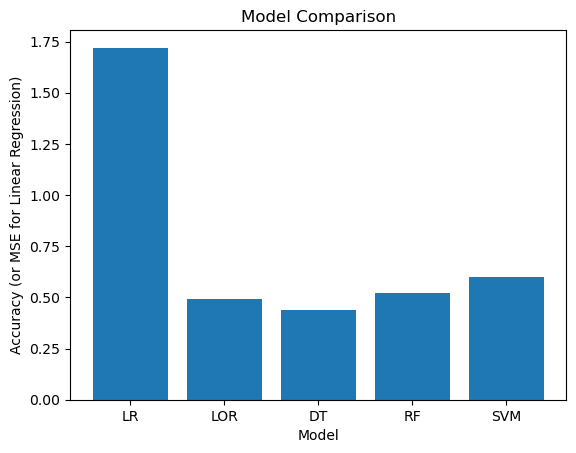

In [77]:
# Plotting the accuracies of different models
models = ['LR', 'LOR', 'DT', 'RF', 'SVM']
accuracies = [
    mean_squared_error(y_test, y_pred_lr),  # For Linear Regression, we use MSE 
    accuracy_score(y_test, y_pred_lr),      # Logistic Regression
    accuracy_score(y_test, y_pred_dt),      # Decision Tree
    accuracy_score(y_test, y_pred_rf),      # Random Forest
    accuracy_score(y_test, y_pred_svm)      # SVM
]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy (or MSE for Linear Regression)')
plt.title('Model Comparison')
plt.show()


#### In Heatmaps

fmt stands for fomat, fmt="g" is used to suppress scientific notation

cbar=False can be used to hide the color bar in confusion matrix

camp = Blues, other colors can be Greens, Reds, Purples, Oranges, coolwarm etc

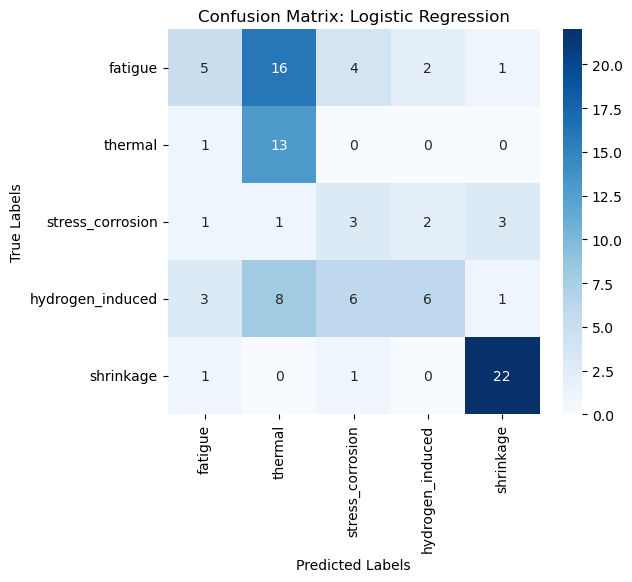

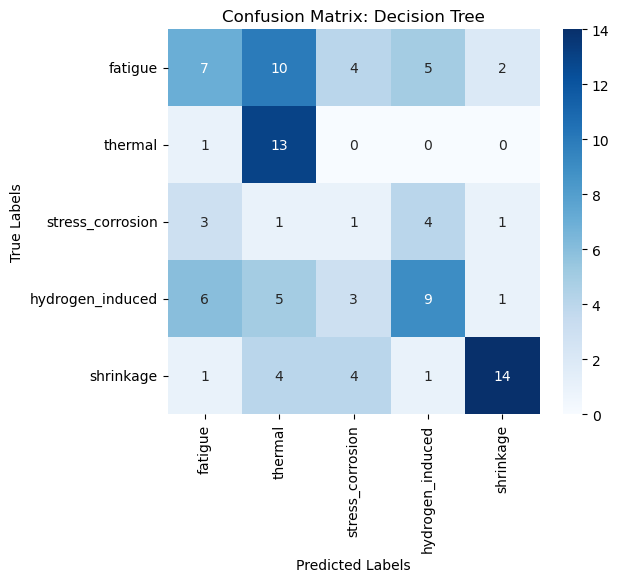

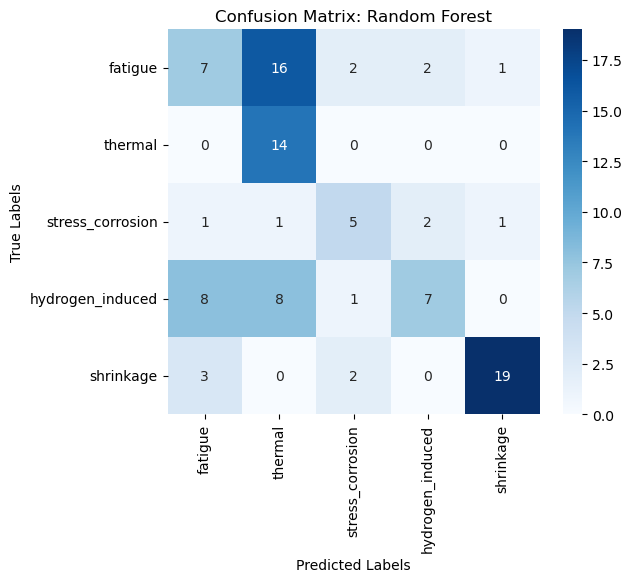

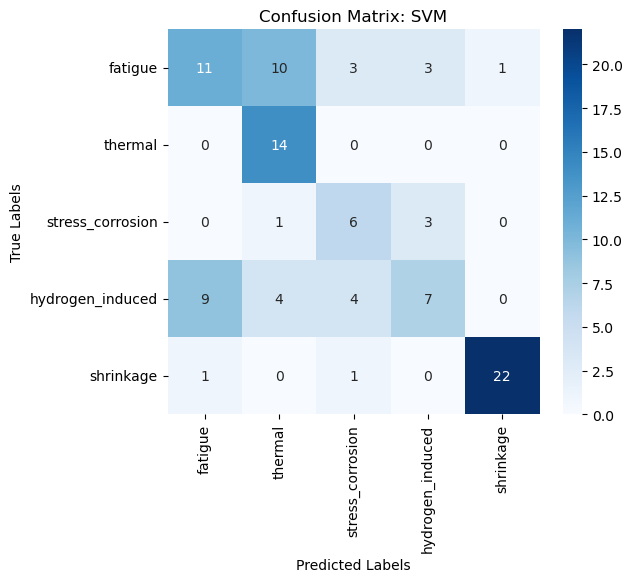

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=subdirectories, yticklabels=subdirectories)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Linear Regression")